# Week 2 Exercise

In [1]:
knitr::opts_chunk$set(echo = TRUE)
suppressPackageStartupMessages(library(tidyverse))
cces <- suppressMessages(drop_na(read_csv("cces_sample_coursera.csv")))

Your objective is to replicate these figures, created using the Cooperative
Congressional Election Study data. These figures are similar to those we
completed in the lecture videos.

### Put your name here: Marcio Woitek

## Exercise 1

Hints:

* For the x-axis, use the variable `ideo5`.
* Make sure you recode the data for the `ideo5` variable to generate the
  correct names for the x-axis. You will want to consult the codebook.
* Use the fill aesthetic to have R fill in the bars. You do not need to set
  the colors manually.
* Use `guides()` to drop the legend.
* Make sure the axis labels and figure title are correct.

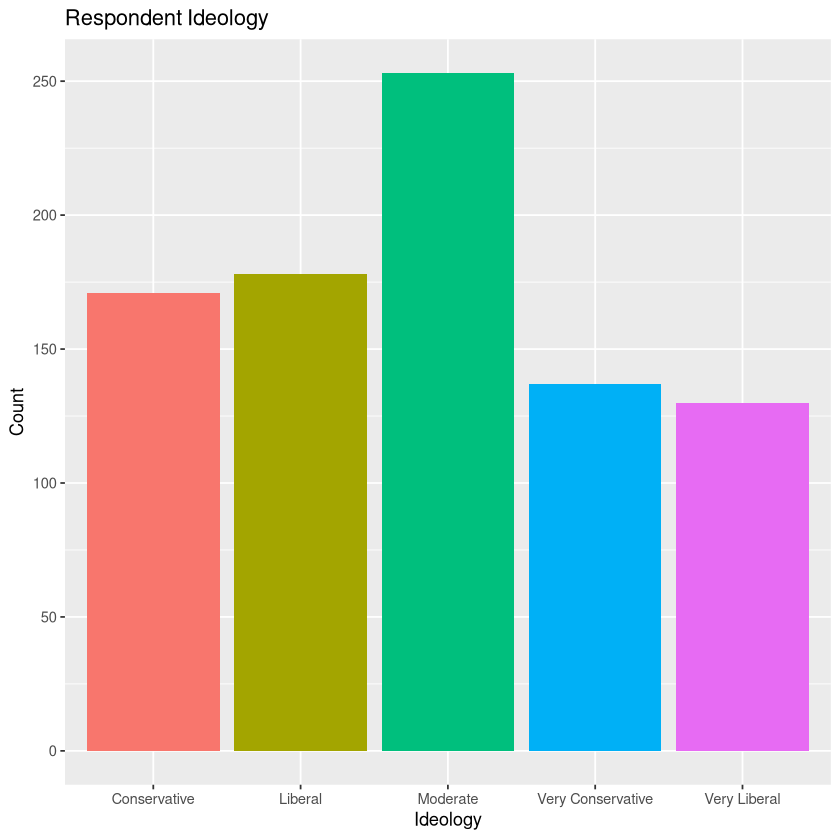

In [2]:
# Get the data that matters for this exercise:
data_plot_1 <- cces %>% select(ideo5)

# Recode the `ideo5` variable:
data_plot_1$ideo5 <- recode(
    data_plot_1$ideo5,
    `1` = "Very Liberal",
    `2` = "Liberal",
    `3` = "Moderate",
    `4` = "Conservative",
    `5` = "Very Conservative"
)

# Plot the figure:
ggplot(data_plot_1, aes(x = ideo5, fill = ideo5)) +
    geom_bar() +
    labs(x = "Ideology", y = "Count", title = "Respondent Ideology") +
    guides(fill = FALSE)

## Exercise 2

Hints:

* For the x-axis, use the variable `pew_religimp`.
* Make sure you recode the data for the `pew_religimp` variable to generate
  the correct labels for the x-axis. You will want to consult the codebook.
* Rename the column for ideology to make sure the first letter is upper-case
  (to make the legend appear correctly).
* Use the fill aesthetic to have R fill in the bars. You do not need to set
  the colors manually.
* Make sure the axis labels and figure title are correct.

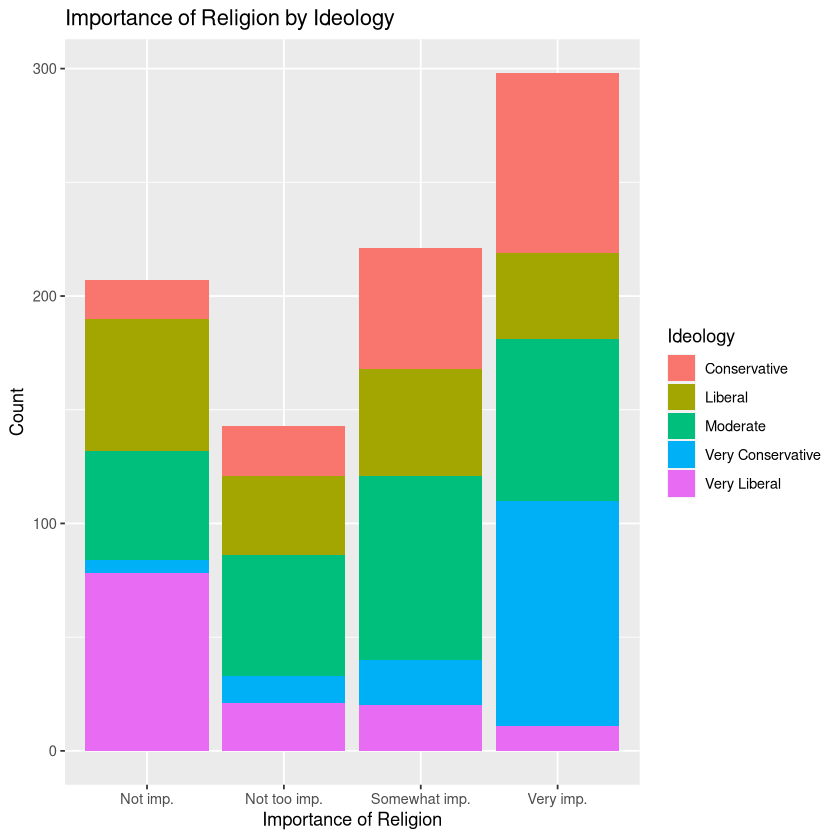

In [3]:
# Get the columns that matter for this exercise:
data_plot_2 <- cces %>% select(ideo5, pew_religimp)

# Recode the `ideo5` variable, and rename it as `Ideology`:
data_plot_2$ideo5 <- recode(
    data_plot_2$ideo5,
    `1` = "Very Liberal",
    `2` = "Liberal",
    `3` = "Moderate",
    `4` = "Conservative",
    `5` = "Very Conservative"
)
data_plot_2 <- data_plot_2 %>% rename(Ideology = ideo5)

# Recode the `pew_religimp` variable:
data_plot_2$pew_religimp <- recode(
    data_plot_2$pew_religimp,
    `1` = "Very imp.",
    `2` = "Somewhat imp.",
    `3` = "Not too imp.",
    `4` = "Not imp."
)

# Plot the figure:
ggplot(data_plot_2, aes(x = pew_religimp, fill = Ideology)) +
    geom_bar() +
    labs(
        x = "Importance of Religion",
        y = "Count",
        title = "Importance of Religion by Ideology"
    )

## Exercise 3

Instructions:

* For this visualization, you are creating your own data for practice.
* Create a tibble/data frame with three columns: Semester, Student, and Grade.
* There should be six semesters and three students (Amanda, Betty, and Carol).
* Create grades for the students using the `runif()` command, with values
  between 80 and 100. Hint: you'll need 18 grades total.

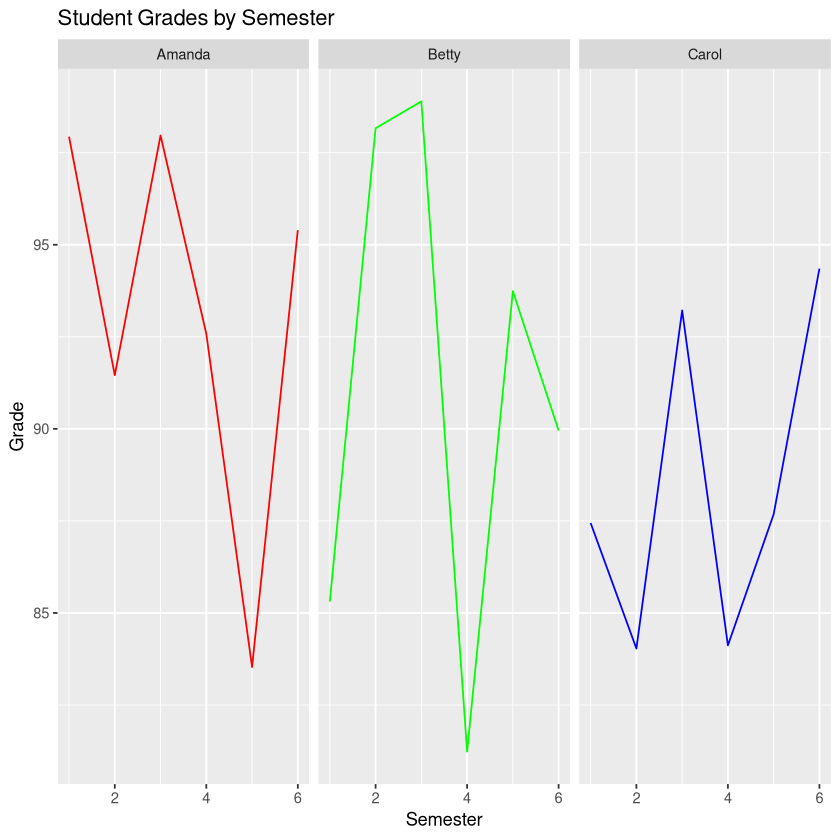

In [4]:
# Number of semesters:
num_semesters <- 6

# Names of the students:
students_names <- c("Amanda", "Betty", "Carol")

# Number of students:
num_students <- length(students_names)

# Create the `Semester` column:
semester <- rep(1:num_semesters, each = num_students)

# Create the `Student` column:
student <- rep(students_names, times = num_semesters)

# Create the `Grade` column:
set.seed(0)
grade <- runif(num_semesters * num_students, min = 80, max = 100)

# Use `semester`, `student` and `grade` to create a tibble:
data_plot_3 <- tibble(
    "Semester" = semester,
    "Student" = student,
    "Grade" = grade
)

# Plot the figure:
ggplot(data_plot_3, aes(x = Semester, y = Grade, color = Student)) +
    geom_line() +
    labs(x = "Semester", y = "Grade", title = "Student Grades by Semester") +
    scale_color_manual(values = c("red", "green", "blue")) +
    facet_wrap(vars(Student)) +
    guides(color = FALSE)